In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
from sklearn.preprocessing import QuantileTransformer

In [3]:
#import dataset
marketing_df = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')

In [4]:
def drop_columns(marketing_df) :
    marketing_df.drop(columns=['Unnamed: 0'], inplace=True)
    return marketing_df

In [5]:
drop_columns(marketing_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
marketing_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [7]:
numeric_int = marketing_df.select_dtypes(include = int)
numeric_int

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


In [8]:
numeric_float = marketing_df.select_dtypes(include = float)
numeric_float

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [9]:
categorical = marketing_df.select_dtypes(include = object)
categorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [10]:
numerical = pd.concat([numeric_int,numeric_float], axis=1)
numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


In [11]:
# Do the distributions for different numerical variables look like a normal distribution
normalized_numerical=(numerical-numerical.min())/(numerical.max()-numerical.min())

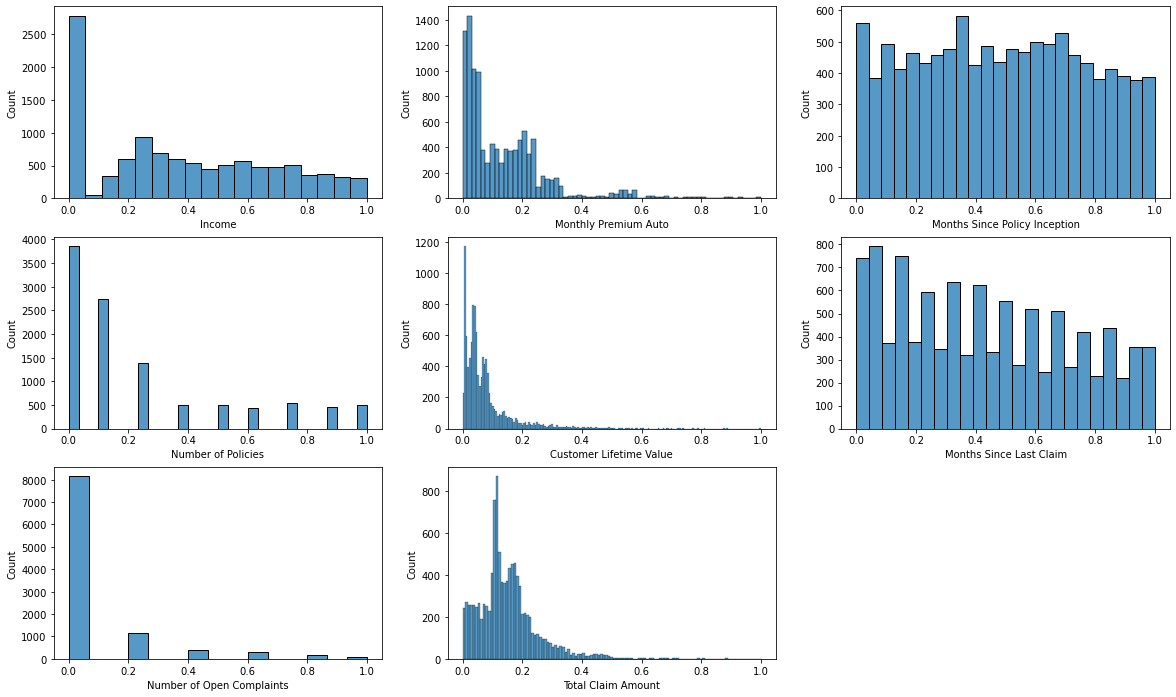

In [12]:
plt.figure(figsize=(20,12))
for i, column in enumerate(normalized_numerical.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(normalized_numerical[column])

In [13]:
#detect and remove outliers
# Income
numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


### Activity 6
X-y split.
Normalize (numerical).
One Hot/Label Encoding (categorical).

In [14]:
# Normalize (Income)
numerical['Income'] = numerical['Income'].replace(0,np.nan)

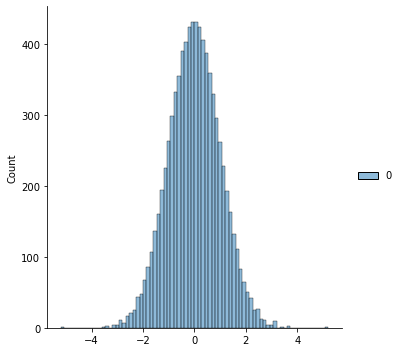

In [15]:
qt = QuantileTransformer(output_distribution = 'normal')
normalized_income = qt.fit_transform(numerical['Income'].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

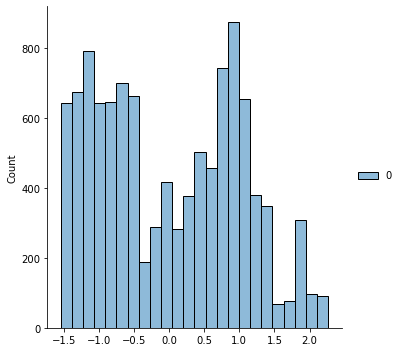

In [16]:
# Normalize (Monthly Premium Auto)
bc = PowerTransformer(method="box-cox")
normalized_monthly_pa = bc.fit_transform(numerical['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(normalized_monthly_pa)

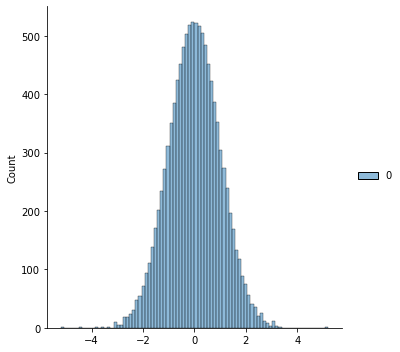

In [17]:
# Normalize (Customer Lifetime Value)
qt = QuantileTransformer(output_distribution = 'normal')
normalized_cust_life_value = qt.fit_transform(numerical['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(normalized_cust_life_value)

In [18]:
numerical['Income'] = normalized_income
numerical['Monthly Premium Auto'] = normalized_monthly_pa
numerical['Customer Lifetime Value'] = normalized_cust_life_value
numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,-0.005408,-1.543722,52,9,-0.393900,7.0,0.0,292.800000
1,NaN,-1.257420,26,1,-2.347504,3.0,0.0,744.924331
2,-1.171096,0.629981,31,2,1.238645,34.0,0.0,480.000000
3,0.026349,0.536569,3,2,1.674186,10.0,0.0,484.013411
4,-1.021977,1.050741,31,7,0.680013,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,NaN,2.153763,40,7,1.287435,NaN,NaN,1214.400000
10906,0.392857,-1.169169,68,6,-0.195288,7.0,0.0,273.018929
10907,-0.231660,1.942457,63,2,1.751568,11.0,0.0,381.306996
10908,0.491722,1.630508,27,6,0.988999,0.0,4.0,618.288849


In [29]:
### drop na from numerical
numerical = numerical.dropna(axis = 0, how = 'any')
numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,-0.005408,-1.543722,52,9,-0.393900,7.0,0.0,292.800000
2,-1.171096,0.629981,31,2,1.238645,34.0,0.0,480.000000
3,0.026349,0.536569,3,2,1.674186,10.0,0.0,484.013411
5,0.063967,-1.543722,73,7,-0.422507,2.0,0.0,292.800000
6,-0.313943,-1.349131,99,4,-0.289828,8.0,3.0,287.556107
...,...,...,...,...,...,...,...,...
10902,-0.680509,0.326723,30,1,-0.801623,10.0,2.0,655.200000
10903,0.340429,-0.504336,82,1,-1.153808,30.0,4.0,355.200000
10906,0.392857,-1.169169,68,6,-0.195288,7.0,0.0,273.018929
10907,-0.231660,1.942457,63,2,1.751568,11.0,0.0,381.306996


In [21]:
X = numerical.iloc[:,:-1]
X

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints
0,-0.005408,-1.543722,52,9,-0.393900,7.0,0.0
2,-1.171096,0.629981,31,2,1.238645,34.0,0.0
3,0.026349,0.536569,3,2,1.674186,10.0,0.0
5,0.063967,-1.543722,73,7,-0.422507,2.0,0.0
6,-0.313943,-1.349131,99,4,-0.289828,8.0,3.0
...,...,...,...,...,...,...,...
10902,-0.680509,0.326723,30,1,-0.801623,10.0,2.0
10903,0.340429,-0.504336,82,1,-1.153808,30.0,4.0
10906,0.392857,-1.169169,68,6,-0.195288,7.0,0.0
10907,-0.231660,1.942457,63,2,1.751568,11.0,0.0


In [22]:
Y = numerical.iloc[:,-1]
Y

0        292.800000
2        480.000000
3        484.013411
5        292.800000
6        287.556107
            ...    
10902    655.200000
10903    355.200000
10906    273.018929
10907    381.306996
10908    618.288849
Name: Total Claim Amount, Length: 7666, dtype: float64

## Activity 7

Model Interpretation.

Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

### Data Splitting

In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=.30,random_state=100)

### Standardize the data

In [24]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

In [25]:
X_test_scaled=std_scaler.transform(X_test)

In [26]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.07958715 -1.53522923  0.44183547 ... -1.87063692 -0.20244598
  -0.42397463]
 [ 0.53008534  1.00871495 -0.2409829  ...  0.67423946  1.38836509
   3.90738736]
 [ 0.61795372 -0.49946182 -1.21130373 ...  0.62365104 -0.40129736
  -0.42397463]
 ...
 [-0.79300465  1.25027773 -1.53474401 ...  1.22014111  0.29468248
   0.65886586]
 [ 1.26531435 -0.56322678 -0.31285851 ... -1.16822248 -0.69957443
   1.74170636]
 [ 0.36479897 -0.00913999  0.87308917 ... -0.99035407 -1.19670289
   2.82454686]]
--------
[[-1.35136389 -0.56322678 -0.85192564 ... -1.35266719 -0.50072305
  -0.42397463]
 [ 0.180456    1.39871068 -1.31911715 ... -0.16640967  0.49353386
  -0.42397463]
 [ 0.48393058  1.25027773 -0.78005003 ...  0.80234875 -1.39555427
  -0.42397463]
 ...
 [-0.08718971  1.38506168 -0.92380126 ... -0.25721994 -0.30187167
   0.65886586]
 [ 0.66255113 -1.53522923  0.5855867  ... -0.43331145 -0.30187167
   0.65886586]
 [ 1.22471524  1.38506168 -0.38473413 ...  1.95171509  0.0958311
  -0.42397463]]


### Apply linear regression

In [27]:
X.columns

Index(['Income', 'Monthly Premium Auto', 'Months Since Policy Inception',
       'Number of Policies', 'Customer Lifetime Value',
       'Months Since Last Claim', 'Number of Open Complaints'],
      dtype='object')

In [28]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(Y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     398.4
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:32:17   Log-Likelihood:                -36146.
No. Observations:                5366   AIC:                         7.231e+04
Df Residuals:                    5358   BIC:                         7.236e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        378.7755      2.784    136.048      0.0

In [30]:
#display adjusted R-squared
print(model.rsquared_adj)

0.34145628253999916


Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

In [32]:
model=LinearRegression()    # model
model.fit(X_train_scaled, Y_train)   # model train

LinearRegression()

In [33]:
model.coef_ #gives you per column the slope (alpha)

array([-57.12733129, 133.84741939,  -3.37203918,  -0.85938057,
         4.5804834 ,  -0.46472152,   0.60823557])

In [34]:
model.intercept_ #gives the optimal slope

378.775507428811

In [35]:
model.score(X_test_scaled,Y_test)

0.32825062946599526